# Histograms
A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. You can use either Matplotlib or Seaborn to plot the histograms. There is a mild variation in the specifics, such as plotting gaussian-estimation line along with bars in Seabron's distplot(), and the arguments that you can use in either case.

## Matplotlib.pyplot.hist()
You can use the default settings for matplotlib's hist() function to plot a histogram with 10 bins:

### Example 1. Plot a default histogram

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

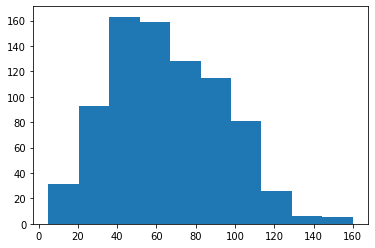

In [3]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.hist(data = pokemon, x = 'speed')

You can see a non-uniform distribution of data points in different bins.

Overall, a generally bimodal distribution is observed (one with two peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasizes the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.

Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?

You can use descriptive statistics (e.g. via `dataframe['column'].describe()`) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's``arange` function:

### Example 2. Histogram with fixed number of bins

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

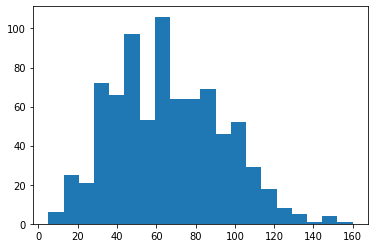

In [4]:
plt.hist(data = pokemon, x = 'speed', bins = 20)

### Example 3. Histogram with dynamic number of bins

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

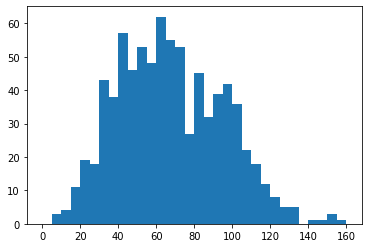

In [5]:
# Create bins with step-size 5
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

The first argument to `arange` is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. Note that even though I've specified the "max" value in the second argument, I've added a "+5" (the bin width). That is because `arange` will only return values that are strictly less than the upper limit. Adding in "+5" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's `around` if you wanted to approach that end programmatically.

## Alternative Approach - Seaborn's distplot()

This function can also plot histograms, as similar to the `pyploy.hist()` function, and is integrated with other univariate plotting functions. This is in contrast to our ability to specify a data source and column as separate arguments, like we've seen with and `countplot` and `hist`.

The basic syntax is:

`seaborn.distplot(Series, bins, kde, hist_kws)`

Let's see the sample usage of the arguments mentioned above. However, there are many other arguments that you can explore in the syntax definition.

Note: From the Seaborn v0.11.0 onwards, this function is deprecated and will be removed in a future version. You can use either of the following two functions: displot() or histplot() to plot histograms using Seaborn.
### Example 4. Plot the similar histogram with Seaborn's distplot()

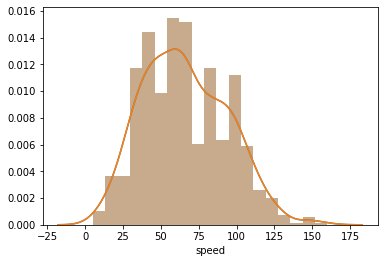

In [7]:
sb.distplot(pokemon['speed'])

# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.distplot(pokemon['speed'], kde=True)

The `distplot` function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. If you want to learn more about KDEs, check out the extra page at the end of the lesson.

Despite the fact that the default bin-selection formula used by `distplot` might be better than the choice of ten bins that`.hist` uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

In [8]:
bin_edges = np.arange(0, df['num_var'].max()+1, 1)
sb.distplot(df['num_var'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})

NameError: name 'df' is not defined

The alpha (transparency) setting must be associated as a dictionary to "hist_kws" since there are other underlying plotting functions, like the KDE, that have their own optional keyword parameters.

## Plot two histograms side-by-side
When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with the identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

Let's see a new example demonstrating a few new functions, `pyplot.subplot()` and `pyplot.figure()`. We will learn more in the upcoming concepts.

### Example 5. Plot two histograms side-by-side

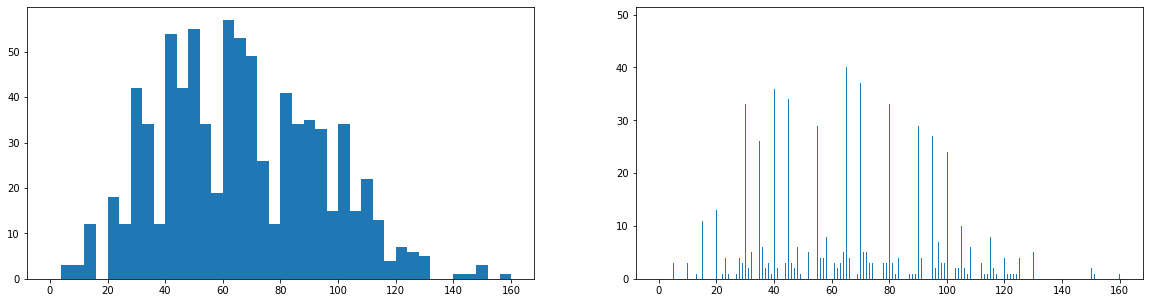

In [9]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

This example puts two plots side by side through use of the `subplot` function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The``figure()` function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

## Summary of Histograms
In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by `distplot`, then you might be better off with just using Matplotlib's `hist` function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic `distplot` first before getting into the customization.